### Libraries¶

In [80]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

### Helper functions

In [81]:
def get_file_path(base_folder_path,file_name):
    """
    This function takes the parameter base_folder_path and file_name
    Return final path of file
    """
    return base_folder_path + file_name

def get_data_frame_from_csv(file_path):
    """
    This function is used to create and return the data frame from csv file
    parameters: file_path
    return: Panda data frame
    """
    return pd.read_csv(file_path)
def get_expanded_dataframe(df,json_data_column,row_col_list,json_data_col_list):
    """
    This function perform the operation on json data columns and explode the data points and return the final data frame

    Args:
        df (Pandas data frame): Original Data frame which has json column
        json_data_column (String): Json data column name 
        row_col_list (List): List of feature which needs to be taken during explode
        json_data_col_list (List): Json data key list

    Returns:
        Panda Dataframe: After explode of json data return the final data frame
    """
    row_expaned = []
    for _, row in df.iterrows():
        json_data = json.loads(row[json_data_column])
        for item_json in json_data:
            data_dict = {}
            for item in row_col_list:
                data_dict[item] = row[item]
            for item in json_data_col_list:
                data_dict[item] = item_json[item]
            row_expaned.append(data_dict)
    return pd.DataFrame(row_expaned)
    
def get_merged_data_frame(df1,df2,left_on,right_on,how):
    """
    This function merge the data frame

    Args:
        df1 (Pandas data frame): data frame
        df2 (Pandas data frame): data frame
        left_on (String or List): left column names
        right_on (List or String): right column names
        how (String): How is the join left,right,inner

    Returns:
        Pandas Data frame: Merged data frame
    """
    return df1.merge(df2, left_on=left_on,right_on=right_on,how=how)

def fill_na(df,column_name,null_value):
    """
    Fill the null value with constant for a feature in Data Frame

    Args:
        df (Pandas Data Frame): Data Frame
        column_name (String): Column name which has null value
        null_value (Str or int or any thing): NUll value which can be filled for a column
    """
    df[column_name] = df[column_name].fillna(null_value)
    return df

def count_distributation_plot(df,fig_size,column_name,plot_title,palette="coolwarm"):
    """
    This function plot the dsitribuation count of discrete feature

    Args:
        df (Pandas Data frame): Pandas Data frame
        fig_size (Touple): Figure size of the plot
        column_name (String): Column name 
        palette (str, optional): Plot featiure. Defaults to "coolwarm".
    """
    plt.figure(figsize=fig_size)
    sns.countplot(data=df,x=column_name,palette=palette)
    plt.title(plot_title)
    plt.show()

### Data load

In [82]:
# Base folder path
base_folder = "../source/"
# Vistors file path
visitors_path = get_file_path(base_folder,"visitors.csv")
# vistors questions file path
visitors_questions_path = get_file_path(base_folder,"visitors_questions.csv")
# visitors answers path
visitors_answers_path = get_file_path(base_folder,"visitors_answers.csv")
exhibitors_path = get_file_path(base_folder,"exhibitors.csv")
exhibitors_categories_path = get_file_path(base_folder,"exhibitor_categories.csv")

In [83]:
visitors_df = get_data_frame_from_csv(visitors_path) # Visitor data frame from visitors file
visitors_questions_df = get_data_frame_from_csv(visitors_questions_path) # Visitors questions data frame from question file
visitors_answers_df = get_data_frame_from_csv(visitors_answers_path) # Visitors answers data frame from answers file

#### Data cleaning and processing

In [84]:
visitors_df.head(10)

,email,gender,id,data
0,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
1,aleksandar.dimkov+mitt1_n5eA@bss.com.mk,M,67ada1ee197e604dd2722d1b,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
2,daniela.p+150_YhiF@bss.com.mk,F,67b44fef197e604dd2722d3d,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
3,tanja+182_jiPa@bss.com.mk,F,67b45018197e604dd2722d3e,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
4,aleksandar.dimkov+mitt10_V0iB@bss.com.mk,M,67b5f1392d21f543a10965f1,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
5,3990147_SeNs@gmail.com,M,67b5e0f7774d9e718c7541db,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
6,tanja+182_Ahsx@bss.mk,M,67b45356197e604dd2722d43,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
7,daniela.p+201_Fwae@bss.com.mk,M,67b47874197e604dd2722d6f,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
8,tanja+202_99oJ@bss.mk,F,67b708f32d21f543a10965fa,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."
9,emilija+3_CmwU@bss.com.mk,F,67b46946197e604dd2722d5d,"[{ ""stepId"" : ""5c8a78336d41a10da4f730ef"", ""que..."


#### Visitor data has following features
- Email
- Gender
- Id (Unique feature)
- data (It shows the question answer related information)

In [85]:
visitors_df["data"][0]

'[{ "stepId" : "5c8a78336d41a10da4f730ef", "questionId" : "5c8a78336d41a10da4f730f0", "answerValue" : "", "answerId" : "5c8a78336d41a10da4f730f2", "answerTypeId" : "Answer" }, { "stepId" : "6507da8d9e117216630ef7ed", "questionId" : "6507de7e9e117216630ef7f2", "answerValue" : "emilija+100_L8gA@bss.mk", "answerId" : "", "answerTypeId" : "Answer" }, { "stepId" : "6507dfbb9e117216630ef7f3", "questionId" : "6507e0219e117216630ef7f5", "answerValue" : "3138", "answerId" : "", "answerTypeId" : "Answer" }, { "stepId" : "5c8a78336d41a10da4f733ce", "questionId" : "5c8a78336d41a10da4f733d8", "answerValue" : "Eme", "answerId" : "", "answerTypeId" : "Answer" }, { "stepId" : "5c8a78336d41a10da4f733ce", "questionId" : "5c8a78336d41a10da4f733e2", "answerValue" : "Jankova", "answerId" : "", "answerTypeId" : "Answer" }, { "stepId" : "5c8a78336d41a10da4f733ce", "questionId" : "5c8a78336d41a10da4f733cf", "answerValue" : "Emilija", "answerId" : "", "answerTypeId" : "Answer" }, { "stepId" : "5c8a78336d41a10d

Out comes
- Data column has list of question and answer data
- each item has structure like
- { "stepId" : "5c8a78336d41a10da4f730ef",
 "questionId" : "5c8a78336d41a10da4f730f0",
 "answerValue" : "", 
 "answerId" : "5c8a78336d41a10da4f730f2",
 "answerTypeId" : "Answer" }

In [86]:
# Get the visitor data frame 
visitors_df = get_expanded_dataframe(visitors_df,"data",["email","gender","id"],
     ["stepId","questionId","answerValue","answerId","answerTypeId"])
# Get the percentage of null value
visitors_df.isnull().mean()*100

email           0.0
gender          0.0
id              0.0
stepId          0.0
questionId      0.0
answerValue     0.0
answerId        0.0
answerTypeId    0.0
dtype: float64

##### Outcomes
- There are no null value but there are empty values

In [87]:
visitor_question_df = get_merged_data_frame(df1 = visitors_df,
                                             df2 = visitors_questions_df,
                                             left_on = ["questionId","stepId"],
                                             right_on = ["id","stepId"],
                                             how = "left")
visitor_question_df.drop(columns=["id_y"], inplace = True)
visitor_question_df.rename(columns={"id_x":"id"},inplace = True)
visitor_question_df.head(5)
visitor_question_df.isnull().mean()*100

email              0.000000
gender             0.000000
id                 0.000000
stepId             0.000000
questionId         0.000000
answerValue        0.000000
answerId           0.000000
answerTypeId       0.000000
questionTypeId    86.169084
question          86.169084
dtype: float64

#### Observations
- There are 86.17% questions missing from visitor profile
- We can ignore these data points as we do not have questions so we can not do analysis

In [88]:
visitor_question_answer_df = get_merged_data_frame(visitor_question_df,visitors_answers_df,["answerId","questionId"],["id","questionId"],"left")
# visitor_question_df.merge(visitors_answers_df, left_on=["answerId","questionId"],right_on=["id","questionId"],how="left")
visitor_question_answer_df.drop(columns=["id_y"], inplace = True)
visitor_question_answer_df.rename(columns={"id_x":"id"},inplace = True)
visitor_question_answer_df.head(10)

,email,gender,id,stepId,questionId,answerValue,answerId,answerTypeId,questionTypeId,question,answer
0,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730ef,5c8a78336d41a10da4f730f0,,5c8a78336d41a10da4f730f2,Answer,NaN,NaN,NaN
1,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,6507da8d9e117216630ef7ed,6507de7e9e117216630ef7f2,emilija+100_L8gA@bss.mk,,Answer,NaN,NaN,NaN
2,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,6507dfbb9e117216630ef7f3,6507e0219e117216630ef7f5,3138,,Answer,NaN,NaN,NaN
3,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733d8,Eme,,Answer,NaN,NaN,NaN
4,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733e2,Jankova,,Answer,NaN,NaN,NaN
5,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733cf,Emilija,,Answer,NaN,NaN,NaN
6,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733d9,,5c8a78336d41a10da4f733de,Answer,NaN,NaN,NaN
7,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730f3,5c8a78336d41a10da4f730f4,Russia,5c8a78346d41a10da4f7348e,Country,NaN,NaN,NaN
8,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730f3,5c8a78336d41a10da4f730f4,Komi Republic,5c8a78346d41a10da4f734a6,Region,NaN,NaN,NaN
9,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730f3,5c8a78336d41a10da4f730f5,Komi,,Answer,NaN,NaN,NaN


In [89]:
visitor_question_answer_df.isnull().mean()*100

email              0.000000
gender             0.000000
id                 0.000000
stepId             0.000000
questionId         0.000000
answerValue        0.000000
answerId           0.000000
answerTypeId       0.000000
questionTypeId    86.169084
question          86.169084
answer            87.230279
dtype: float64

#### Observations
- There are more missing value in answers csv file
- It seems that 87.23% of answers are missing while 86.17 % questions were missing

#### Before Cleaning Data analysis

In [90]:
# Copy the data frame
visitor_question_answer_with_null = visitor_question_answer_df.copy()
# Fill Question null value with Unknown
visitor_question_answer_with_null = fill_na(visitor_question_answer_with_null,"question","Unknown")
# Fill answer value with Unknown
visitor_question_answer_with_null = fill_na(visitor_question_answer_with_null,"answer","Unknown")
# Sanity check the null value filled properly
visitor_question_answer_with_null.isnull().sum()

email                0
gender               0
id                   0
stepId               0
questionId           0
answerValue          0
answerId             0
answerTypeId         0
questionTypeId    2436
question             0
answer               0
dtype: int64

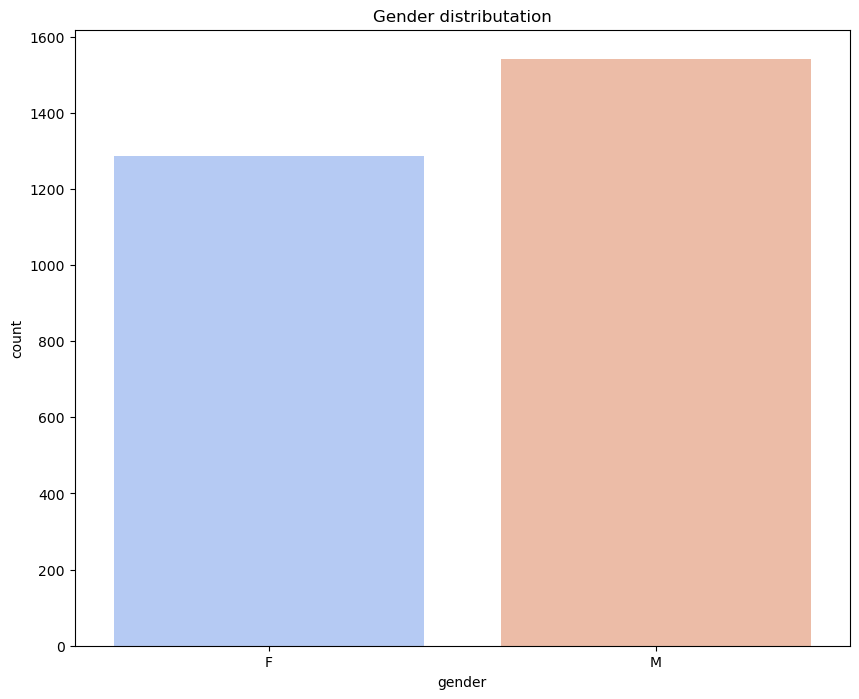

In [91]:
count_distributation_plot(visitor_question_answer_with_null,(10,8),"gender","Gender distributation")

#### Observations
- From Distributation graph it seems that More number of Male visitor vist the exihibition
- There is subtle difference between the number of Male and Feamle visitors so it can be considered as equal participation

In [92]:
visitor_question_answer_with_null.head()

,email,gender,id,stepId,questionId,answerValue,answerId,answerTypeId,questionTypeId,question,answer
0,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730ef,5c8a78336d41a10da4f730f0,,5c8a78336d41a10da4f730f2,Answer,NaN,Unknown,Unknown
1,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,6507da8d9e117216630ef7ed,6507de7e9e117216630ef7f2,emilija+100_L8gA@bss.mk,,Answer,NaN,Unknown,Unknown
2,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,6507dfbb9e117216630ef7f3,6507e0219e117216630ef7f5,3138,,Answer,NaN,Unknown,Unknown
3,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733d8,Eme,,Answer,NaN,Unknown,Unknown
4,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733e2,Jankova,,Answer,NaN,Unknown,Unknown


In [93]:
# Map stepId to stepId_int due to large length of stepId
visitor_question_answer_with_null["stepId_int"] = visitor_question_answer_with_null.groupby("stepId").ngroup() + 1
visitor_question_answer_with_null.head()

,email,gender,id,stepId,questionId,answerValue,answerId,answerTypeId,questionTypeId,question,answer,stepId_int
0,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730ef,5c8a78336d41a10da4f730f0,,5c8a78336d41a10da4f730f2,Answer,NaN,Unknown,Unknown,1
1,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,6507da8d9e117216630ef7ed,6507de7e9e117216630ef7f2,emilija+100_L8gA@bss.mk,,Answer,NaN,Unknown,Unknown,10
2,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,6507dfbb9e117216630ef7f3,6507e0219e117216630ef7f5,3138,,Answer,NaN,Unknown,Unknown,11
3,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733d8,Eme,,Answer,NaN,Unknown,Unknown,9
4,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f733ce,5c8a78336d41a10da4f733e2,Jankova,,Answer,NaN,Unknown,Unknown,9


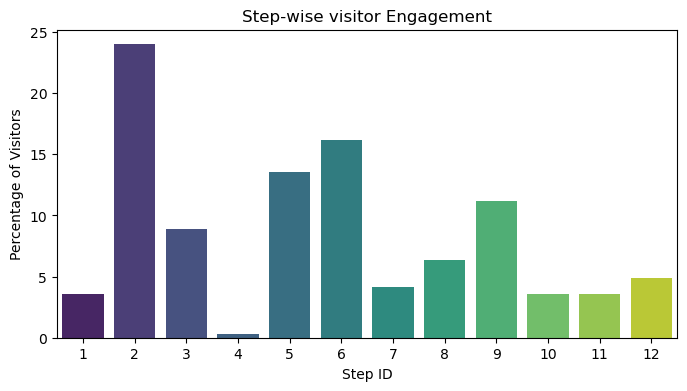

In [94]:
# Step Id count per step
step_counts = visitor_question_answer_with_null["stepId_int"].value_counts(normalize=True) * 100
plt.figure(figsize=(8,4))
sns.barplot(x=step_counts.index, y=step_counts.values, palette="viridis")
plt.xlabel("Step ID")
plt.ylabel("Percentage of Visitors")
plt.title("Step-wise visitor Engagement")
plt.show()

#### Observations
- From the above graph it seems that step 2, 6,9 are more engagable step
- Step 4 is least engage step
- Rest are seems average engagement

In [95]:
top_questions = visitor_question_answer_with_null["question"].value_counts().head(10)
top_answers = visitor_question_answer_with_null["answer"].value_counts().head(10)
# Print Most Asked Questions
print("Top 10 Questions:")
print(top_questions, "\n")

# Print Most Selected Answers
print("Top 10 Answers:")
print(top_answers, "\n")

Top 10 Questions:
question
Unknown                                                             2436
Reason for Attending the Event                                       100
Which of the following best describes your job function?              87
Please indicate your company's main area of business                  87
What role do you play in the purchasing decision making process?      87
What is your company's annual purchasing budget?                      30
Name: count, dtype: int64 

Top 10 Answers:
answer
Unknown                             2466
Travel Agent                          54
To source products and services       35
No influence                          30
Advisory role                         27
To obtain general information         24
To promote products and services      20
Tour Operator                         19
Up to 1 million rubles                18
Joint responsibility                  18
Name: count, dtype: int64 



#### Observation
- Most freaquently question is 'Reason for attending the event'
- Least asked question is the 'What is your company's annual purchasing budget'
- Most frequent answer is Travel agent , To source product and service
- Least frequent answer is Up to 1 million rubles, Joint responsibility

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


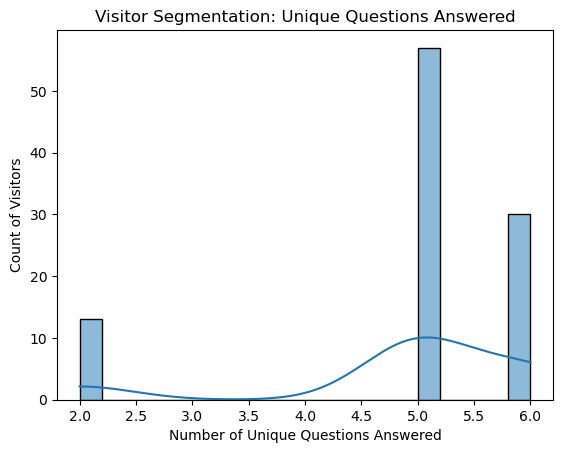

In [96]:
# Visitor segmentation on the basis of unique question they answered
visitor_segmentation = visitor_question_answer_with_null.groupby("email")["question"].nunique()
sns.histplot(visitor_segmentation, bins=20, kde=True)
plt.title("Visitor Segmentation: Unique Questions Answered")
plt.xlabel("Number of Unique Questions Answered")
plt.ylabel("Count of Visitors")
plt.show()

#### Analysis after removing the null value in The questions

In [97]:
visitor_question_answer_df = visitor_question_answer_df[~visitor_question_answer_df["question"].isnull()]
visitor_question_answer_df.isnull().mean()*100

email             0.000000
gender            0.000000
id                0.000000
stepId            0.000000
questionId        0.000000
answerValue       0.000000
answerId          0.000000
answerTypeId      0.000000
questionTypeId    0.000000
question          0.000000
answer            7.672634
dtype: float64

In [98]:
visitor_question_answer_df.shape

(391, 11)

In [106]:
visitor_question_answer_df.head()

,email,gender,id,stepId,questionId,answerValue,answerId,answerTypeId,questionTypeId,question,answer,stepId_int
14,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f730fe,,5c8a78336d41a10da4f73100,Answer,5bf7c399b82beb7a182cc3de,Reason for Attending the Event,To obtain general information,1
20,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f73225,5c8a78336d41a10da4f73227,,5c8a78336d41a10da4f73244,Answer,5bf7c399b82beb7a182cc3de,Which of the following best describes your job...,Media,2
23,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f73252,5c8a78336d41a10da4f73253,,5c8a78336d41a10da4f73291,Answer,5bf7c399b82beb7a182cc3de,Please indicate your company's main area of bu...,Travel Agent,3
31,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f7336c,5c8a78336d41a10da4f7336d,,5c8a78336d41a10da4f73371,Answer,5bf7c399b82beb7a182cc3de,What role do you play in the purchasing decisi...,No influence,4
47,aleksandar.dimkov+mitt1_n5eA@bss.com.mk,M,67ada1ee197e604dd2722d1b,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f730fe,,5c8a78336d41a10da4f730ff,Answer,5bf7c399b82beb7a182cc3de,Reason for Attending the Event,To source products and services,1


#### Observations
- There are 391 data points after deletions of data points which do not have questions
- There are 11 features

In [99]:
# Fill answer value with Unknown
visitor_question_answer_df = fill_na(visitor_question_answer_df,"answer","Unknown")
visitor_question_answer_df.isnull().mean()*100

email             0.0
gender            0.0
id                0.0
stepId            0.0
questionId        0.0
answerValue       0.0
answerId          0.0
answerTypeId      0.0
questionTypeId    0.0
question          0.0
answer            0.0
dtype: float64

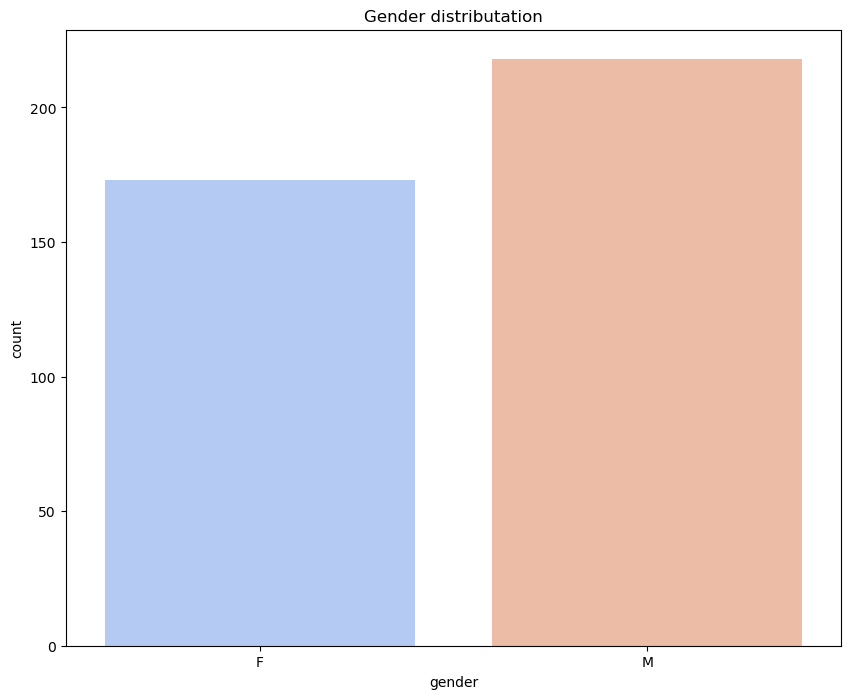

In [100]:
# Map stepId to stepId_int due to large length of stepId
count_distributation_plot(visitor_question_answer_df,(10,8),"gender","Gender distributation")

#### Observations
- From Distributation graph it seems that More number of Male visitor vist the exihibition
- There is subtle difference between the number of Male and Feamle visitors so it can be considered as equal participation

In [101]:
visitor_question_answer_df["stepId_int"] = visitor_question_answer_df.groupby("stepId").ngroup() + 1
visitor_question_answer_df.head()

,email,gender,id,stepId,questionId,answerValue,answerId,answerTypeId,questionTypeId,question,answer,stepId_int
14,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f730fe,,5c8a78336d41a10da4f73100,Answer,5bf7c399b82beb7a182cc3de,Reason for Attending the Event,To obtain general information,1
20,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f73225,5c8a78336d41a10da4f73227,,5c8a78336d41a10da4f73244,Answer,5bf7c399b82beb7a182cc3de,Which of the following best describes your job...,Media,2
23,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f73252,5c8a78336d41a10da4f73253,,5c8a78336d41a10da4f73291,Answer,5bf7c399b82beb7a182cc3de,Please indicate your company's main area of bu...,Travel Agent,3
31,emilija+100_L8gA@bss.mk,F,67b70a9f2d21f543a1096602,5c8a78336d41a10da4f7336c,5c8a78336d41a10da4f7336d,,5c8a78336d41a10da4f73371,Answer,5bf7c399b82beb7a182cc3de,What role do you play in the purchasing decisi...,No influence,4
47,aleksandar.dimkov+mitt1_n5eA@bss.com.mk,M,67ada1ee197e604dd2722d1b,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f730fe,,5c8a78336d41a10da4f730ff,Answer,5bf7c399b82beb7a182cc3de,Reason for Attending the Event,To source products and services,1


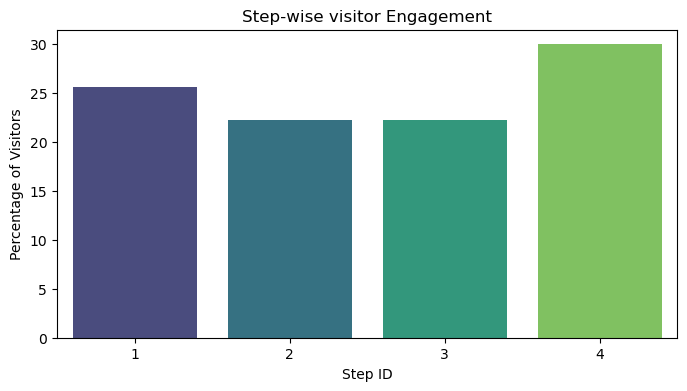

In [102]:
# Step Id count per step
step_counts = visitor_question_answer_df["stepId_int"].value_counts(normalize=True) * 100
plt.figure(figsize=(8,4))
sns.barplot(x=step_counts.index, y=step_counts.values, palette="viridis")
plt.xlabel("Step ID")
plt.ylabel("Percentage of Visitors")
plt.title("Step-wise visitor Engagement")
plt.show()

#### Observations
- From the above graph it seems that step 1,4 more engagable step
- Step 2,3 is least engage step

In [103]:
top_questions = visitor_question_answer_df["question"].value_counts().head(10)
top_answers = visitor_question_answer_df["answer"].value_counts().head(10)
# Print Most Asked Questions
print("Top 10 Questions:")
print(top_questions, "\n")

# Print Most Selected Answers
print("Top 10 Answers:")
print(top_answers, "\n")

Top 10 Questions:
question
Reason for Attending the Event                                      100
Which of the following best describes your job function?             87
Please indicate your company's main area of business                 87
What role do you play in the purchasing decision making process?     87
What is your company's annual purchasing budget?                     30
Name: count, dtype: int64 

Top 10 Answers:
answer
Travel Agent                        54
To source products and services     35
No influence                        30
Unknown                             30
Advisory role                       27
To obtain general information       24
To promote products and services    20
Tour Operator                       19
Joint responsibility                18
Up to 1 million rubles              18
Name: count, dtype: int64 



#### Observation
- Most freaquently question is 'Reason for attending the event'
- Least asked question is the 'What is your company's annual purchasing budget'
- Most frequent answer is Travel agent , To source product and service
- Least frequent answer is Up to 1 million rubles, Joint responsibility

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


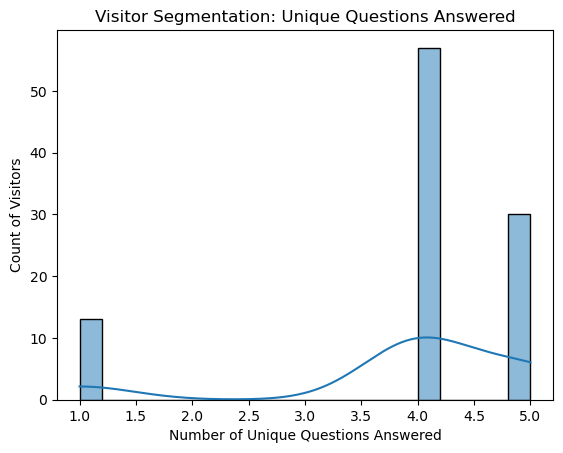

In [104]:
# Visitor segmentation on the basis of unique question they answered
visitor_segmentation = visitor_question_answer_df.groupby("email")["question"].nunique()
sns.histplot(visitor_segmentation, bins=20, kde=True)
plt.title("Visitor Segmentation: Unique Questions Answered")
plt.xlabel("Number of Unique Questions Answered")
plt.ylabel("Count of Visitors")
plt.show()

In [108]:
# Save the cleaned visitor file 
visitor_question_answer_df.to_csv(base_folder+"clean_visitor_data.csv",index=False)